# Project 2

**EDA & Data Cleaning**

Import Statements & Installation 

In [194]:
import calendar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import warnings
import joblib
import xgboost as xgb

In [ ]:
pip install xgboost

In [196]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.cluster import KMeans
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier 
from xgboost import cv
from time import time

Read the .csv file 

In [197]:
df = pd.read_csv('Wholesale customers data.csv')

In [198]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [199]:
df.shape  #Shape of the dataset

(440, 8)

In [200]:
df.info() #Information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [201]:
df.describe() #Description of the statistics of the dataset 

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [202]:
df.Channel.value_counts() #Returns object containing counts of unique values

1    298
2    142
Name: Channel, dtype: int64

In [203]:
df.Region.value_counts() #Returns object containing counts of unique values

3    316
1     77
2     47
Name: Region, dtype: int64

In [204]:
df.isnull().sum() #Checks for null values in the dataset

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [205]:
df.groupby(['Channel', 'Region']).mean() #Mean of all the columns except 'Channel' & 'Region'. Grouped by 'Channel' and 'Region' 

Fresh          Milk       Grocery       Frozen  \
Channel Region                                                          
1       1       12902.254237   3870.203390   4026.135593  3127.322034   
        2       11650.535714   2304.250000   4395.500000  5745.035714   
        3       13878.052133   3486.981043   3886.734597  3656.900474   
2       1        5200.000000  10784.000000  18471.944444  2584.111111   
        2        7289.789474   9190.789474  16326.315789  1540.578947   
        3        9831.504762  10981.009524  15953.809524  1513.200000   

                Detergents_Paper   Delicassen  
Channel Region                                 
1       1             950.525424  1197.152542  
        2             482.714286  1105.892857  
        3             786.682464  1518.284360  
2       1            8225.277778  1871.944444  
        2            8410.263158  1239.000000  
        3            6899.238095  1826.209524

In [206]:
df.groupby(['Channel', 'Region']).sum() #Sum of all the columns except 'Channel' & 'Region'. Grouped by 'Channel' & 'Region'

Fresh     Milk  Grocery  Frozen  Detergents_Paper  \
Channel Region                                                        
1       1        761233   228342   237542  184512             56081   
        2        326215    64519   123074  160861             13516   
        3       2928269   735753   820101  771606            165990   
2       1         93600   194112   332495   46514            148055   
        2        138506   174625   310200   29271            159795   
        3       1032308  1153006  1675150  158886            724420   

                Delicassen  
Channel Region              
1       1            70632  
        2            30965  
        3           320358  
2       1            33695  
        2            23541  
        3           191752

<AxesSubplot:>

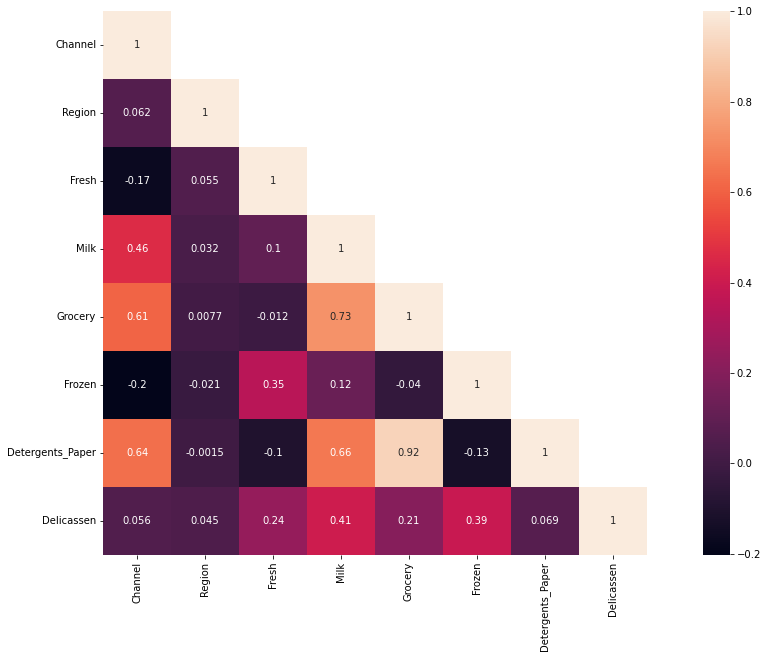

In [207]:
#Heatmap #1
corrMatt = df[["Channel","Region","Fresh","Milk","Grocery","Frozen","Detergents_Paper", "Delicassen"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=1.0, square=True,annot=True)

The heatmap graphs show the volume of all the variables in the Wholesale customers datset. I created two heatmaps just to observe the similarity of the two using different colours. The shades with darker colours represent higher values. 

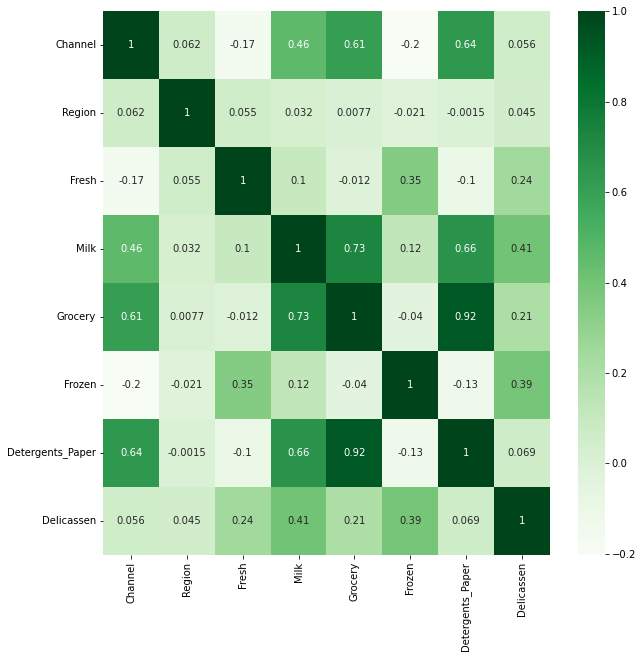

In [208]:
#Heatmap #2
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cbar=True, annot=True, cmap= "Greens")
plt.show()

In [209]:
#Shows the number of outliers in each column of the dataset.
#Detergents_Paper has the highest compared to others.

outliers = {}
for i in range(df.shape[1]):
    min_t = df[df.columns[i]].mean() - (3 * df[df.columns[i]].std())
    max_t = df[df.columns[i]].mean() + (3 * df[df.columns[i]].std())
    count = 0
    for j in df[df.columns[i]]:
        if j < min_t or j > max_t:
            count += 1
    outliers[df.columns[i]] = [count,df.shape[0]-count]
print(outliers)

{'Channel': [0, 440], 'Region': [0, 440], 'Fresh': [7, 433], 'Milk': [9, 431], 'Grocery': [7, 433], 'Frozen': [6, 434], 'Detergents_Paper': [10, 430], 'Delicassen': [4, 436]}


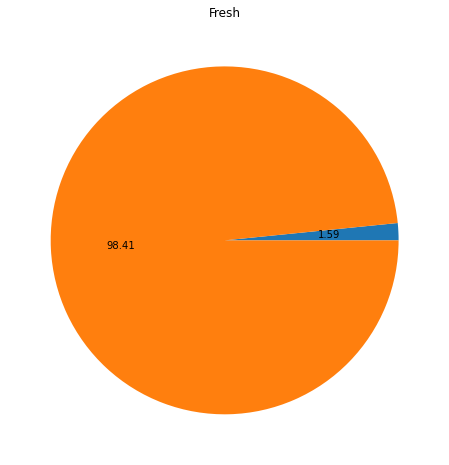

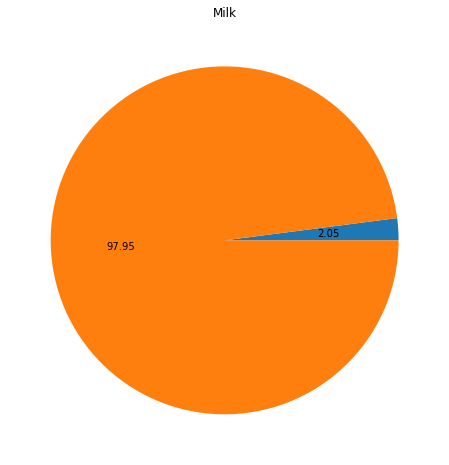

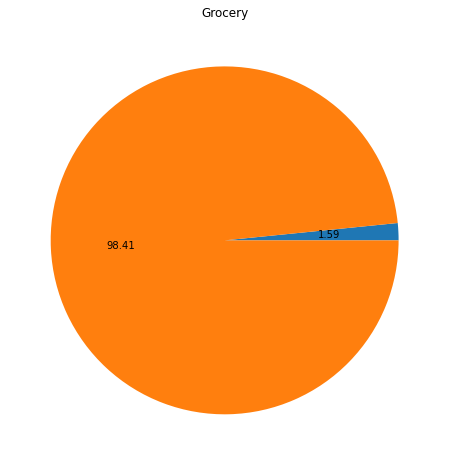

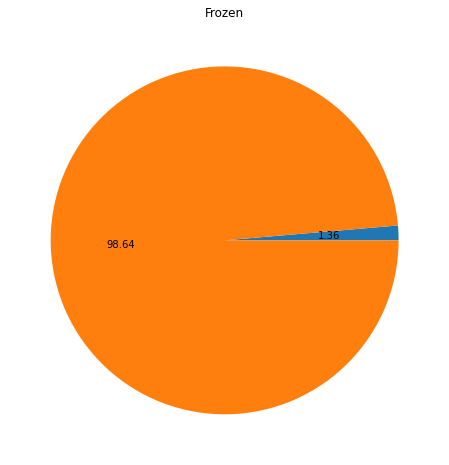

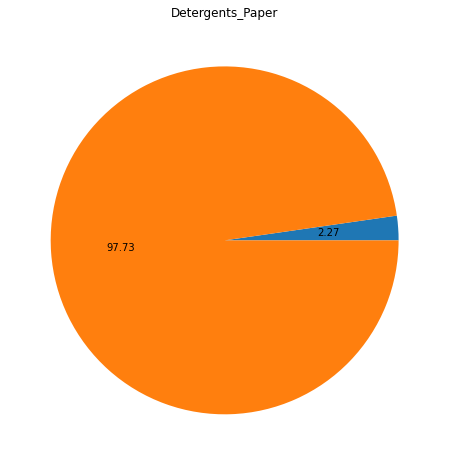

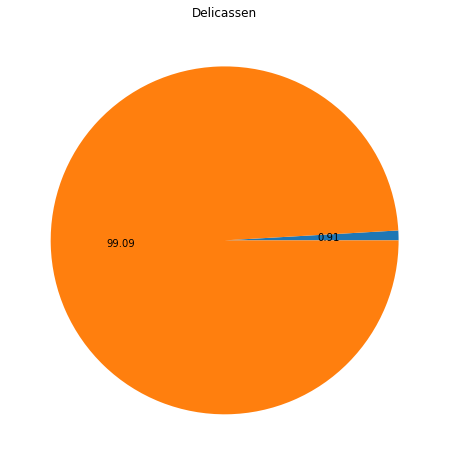

In [210]:
#Pie Chart
for i in (['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']):
    plt.figure(figsize=(8,8))
    plt.pie(outliers[i],autopct="%.2f") 
    plt.title(i)
    plt.show()

These graphs show the outliers in each column of the dataset. From this we can see how the outliers are present but relatively less. So, this graph can be used to determine which Scaler is better to use in the upcoming steps.  

In [211]:
#Standardized data (for future use)
df_standardized = (df - df.mean())/df.std()
df_standardized.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.447005,0.589997,0.052873,0.522972,-0.041068,-0.588697,-0.043519,-0.066264
1,1.447005,0.589997,-0.390857,0.543839,0.170125,-0.269829,0.086309,0.089050
2,1.447005,0.589997,-0.446521,0.408073,-0.028125,-0.137379,0.133080,2.240742
3,-0.689512,0.589997,0.099998,-0.623310,-0.392530,0.686363,-0.498021,0.093305
4,1.447005,0.589997,0.839284,-0.052337,-0.079266,0.173661,-0.231654,1.297870


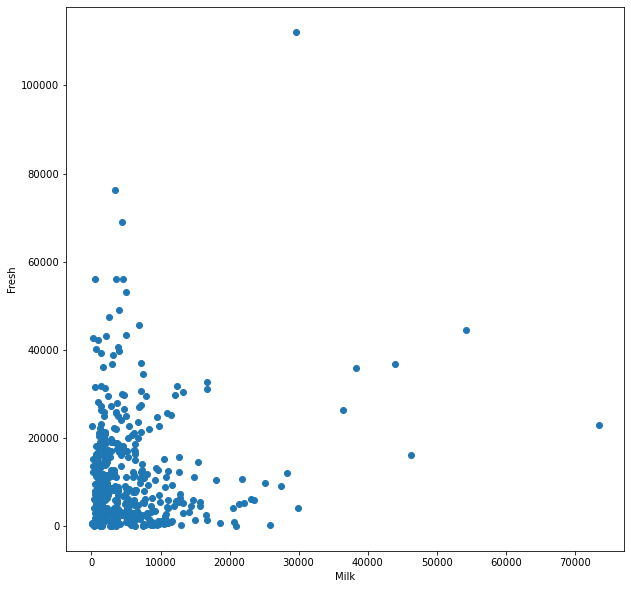

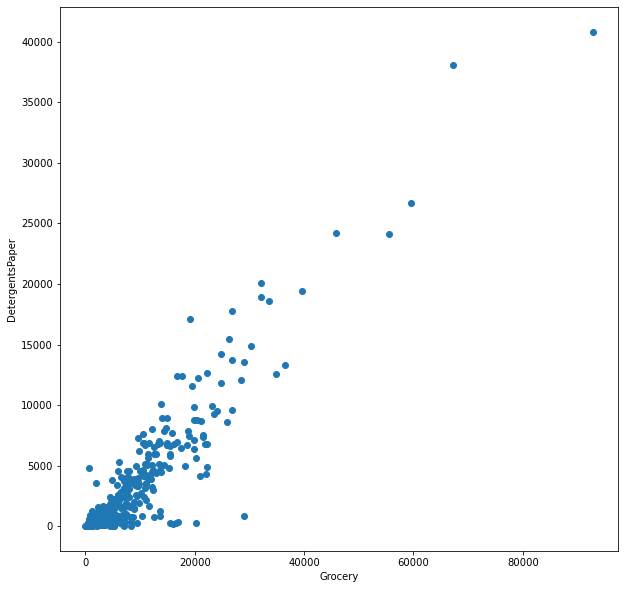

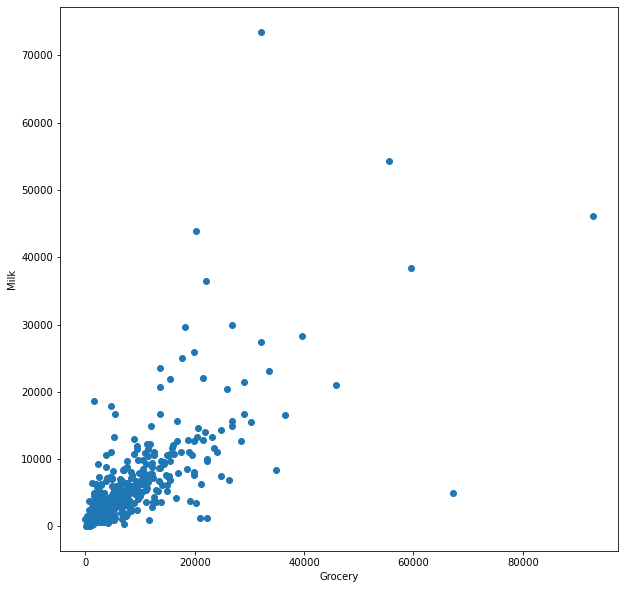

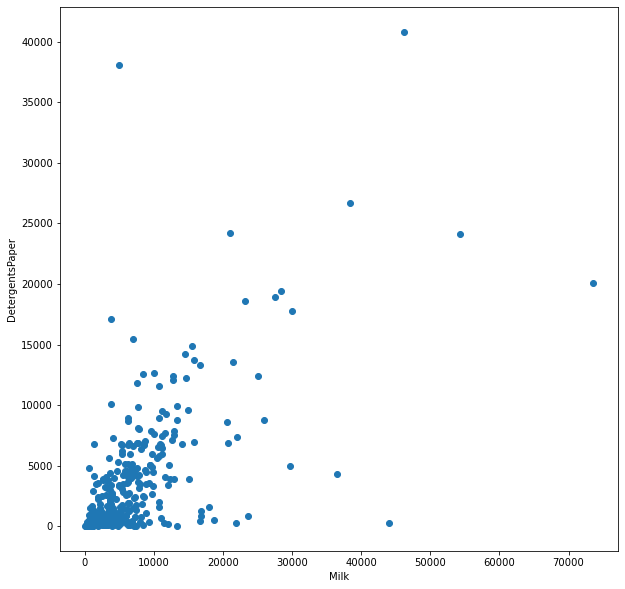

In [212]:
for i in[['Milk', 'Fresh'],['Grocery', 'Detergents_Paper'], ['Grocery', 'Milk'], ['Milk', 'Detergents_Paper']]:
    plt.figure(figsize=(10,10))
    plt.scatter(x=i[0], y=i[1], data=df)
    plt.xlabel(i[0])
    plt.ylabel(i[1].replace("_", ""))
    plt.show()

The scatterplots here show how each variable is affected by another variable. This can be used to see if there is any correlation between the variables. When compared to the pie-chart of each variable, we can notice that any two variables when compared also have almost the same number of outliers present in their graph. 

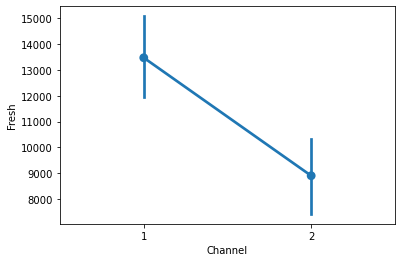

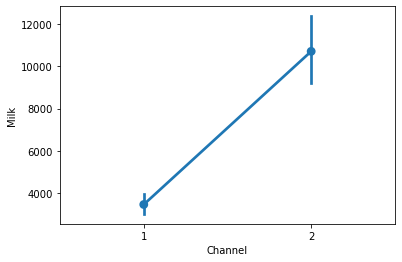

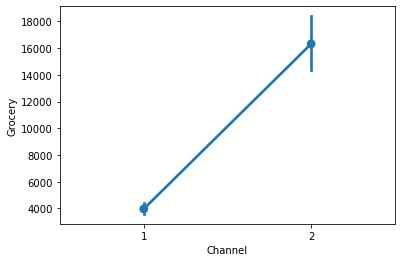

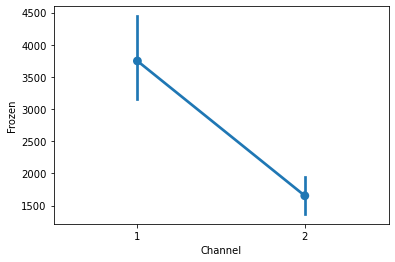

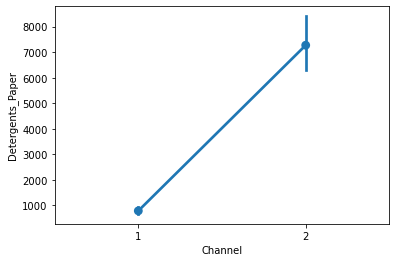

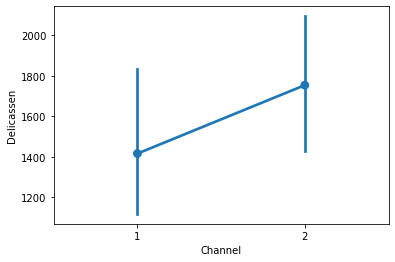

In [213]:
#Point plot for Channel
for i, col in enumerate(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']):
    plt.figure(i)
    sns.pointplot(x='Channel', y=col, data=df)

Both point plots (Channel & Region) represent the values of the variables with respect to 'Channel' and 'Region'. They show the mean estimate and uncertainty of the estimate with a point and error bars for each channel and/or each region. 

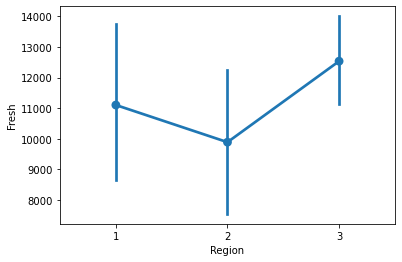

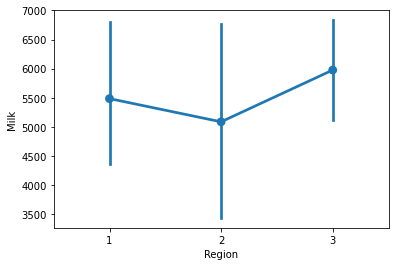

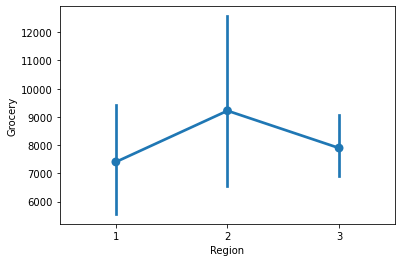

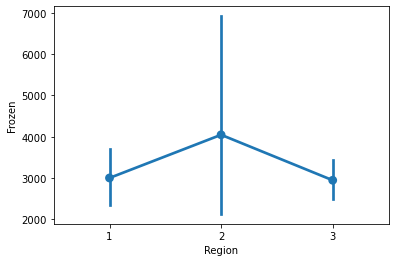

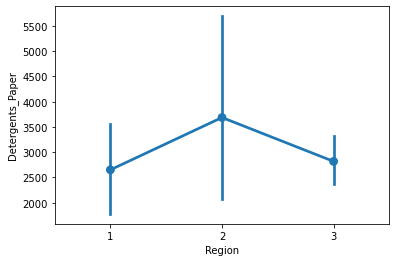

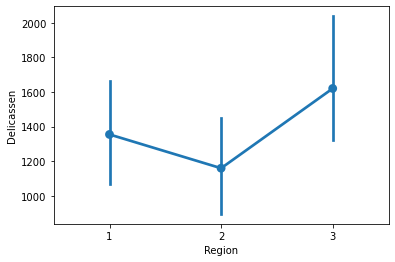

In [214]:
#Point plot for Region
for i, col in enumerate(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']):
    plt.figure(i)
    sns.pointplot(x='Region', y=col, data=df)

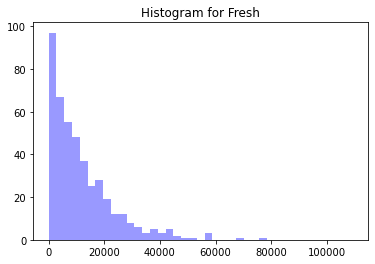

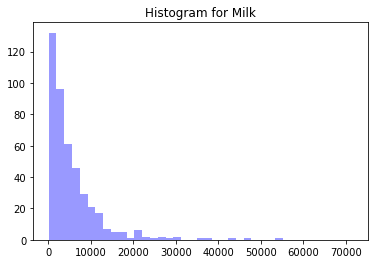

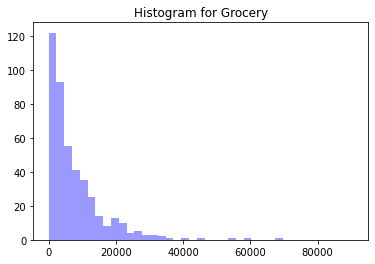

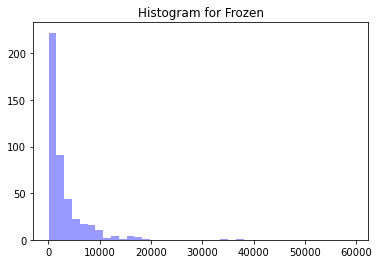

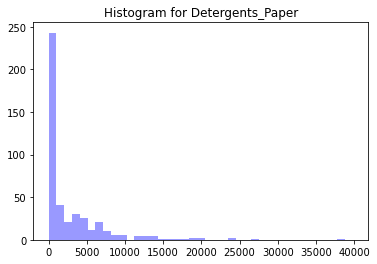

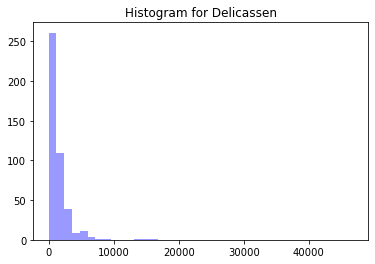

In [215]:
#Histogram 
for i in ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']:
    data = list(df[i])
    xmin = min(data)
    xmax = max(data)
    width = (xmax - xmin)/40
    
    sns.distplot(data, color='b', kde= False, bins=np.arange(xmin, xmax, width))
    #plt.hist(df[i]) --> Too vague and generic making it hard to analyze
    plt.title(f'Histogram for {i}')
    plt.show()
    
    
warnings.filterwarnings('ignore')

All the histograms above summarize the shape of each variable in the dataset. We can observe the distribution of continuous data. Here also, we notice the presence of outliers clearly (similar to the pie charts). 

**Feature Scaling to Normalize**

In [216]:
x = df.drop('Channel', axis=1)
y = df['Channel']

In [217]:
x.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,3,12669,9656,7561,214,2674,1338
1,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
3,3,13265,1196,4221,6404,507,1788
4,3,22615,5410,7198,3915,1777,5185


In [218]:
y.head()

0    2
1    2
2    2
3    1
4    2
Name: Channel, dtype: int64

In [219]:
y[y==2] = 0
y[y==1] = 1

y.head()

0    0
1    0
2    0
3    1
4    0
Name: Channel, dtype: int64

In [220]:
continuous_df = df.loc[:, (df.columns != 'Channel') & (df.columns != 'Region')]
continuous_df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


<AxesSubplot:ylabel='Density'>

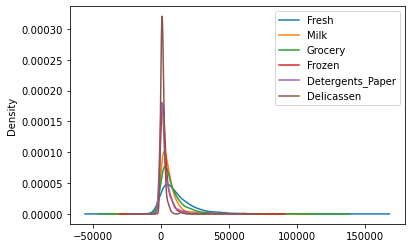

In [221]:
pd.DataFrame(continuous_df).plot(kind='kde')

<AxesSubplot:ylabel='Frequency'>

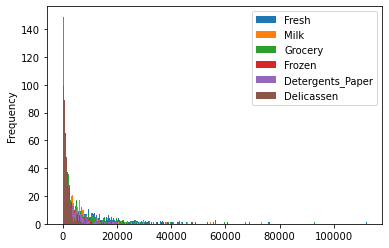

In [222]:
pd.DataFrame(continuous_df).plot(kind='hist', bins =300)

                  0             1             2             3             4  \
count  4.400000e+02  4.400000e+02  4.400000e+02  4.400000e+02  4.400000e+02   
mean  -2.422305e-17 -1.589638e-17 -6.030530e-17  1.135455e-17 -1.917658e-17   
std    1.001138e+00  1.001138e+00  1.001138e+00  1.001138e+00  1.001138e+00   
min   -9.496831e-01 -7.787951e-01 -8.373344e-01 -6.283430e-01 -6.044165e-01   
25%   -7.023339e-01 -5.783063e-01 -6.108364e-01 -4.804306e-01 -5.511349e-01   
50%   -2.767602e-01 -2.942580e-01 -3.366684e-01 -3.188045e-01 -4.336004e-01   
75%    3.905226e-01  1.890921e-01  2.849105e-01  9.946441e-02  2.184822e-01   
max    7.927738e+00  9.183650e+00  8.936528e+00  1.191900e+01  7.967672e+00   

                  5  
count  4.400000e+02  
mean  -8.276208e-17  
std    1.001138e+00  
min   -5.402644e-01  
25%   -3.964005e-01  
50%   -1.985766e-01  
75%    1.048598e-01  
max    1.647845e+01  


<AxesSubplot:title={'center':'Histogram of StandardScaler'}, ylabel='Frequency'>

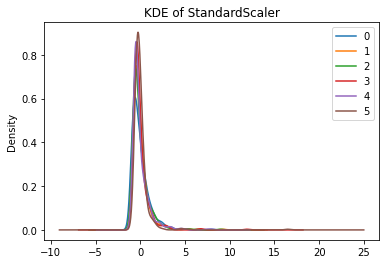

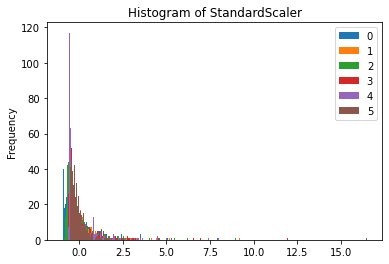

In [223]:
scaled_std = StandardScaler().fit_transform(continuous_df)
print(pd.DataFrame(scaled_std).describe())
pd.DataFrame(scaled_std).plot(kind='kde', title= 'KDE of StandardScaler')
pd.DataFrame(scaled_std).plot(kind='hist', bins= 300, title= 'Histogram of StandardScaler')

                0           1           2           3           4           5
count  440.000000  440.000000  440.000000  440.000000  440.000000  440.000000
mean     0.106977    0.078173    0.085671    0.050078    0.070510    0.031745
std      0.112774    0.100491    0.102430    0.079789    0.116790    0.058826
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000
25%      0.027863    0.020124    0.023174    0.011788    0.006216    0.008453
50%      0.075802    0.048636    0.051225    0.024670    0.019927    0.020077
75%      0.150968    0.097154    0.114821    0.058005    0.095997    0.037907
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000


<AxesSubplot:title={'center':'Histogram of MinMaxScaler'}, ylabel='Frequency'>

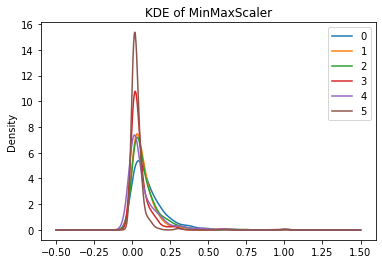

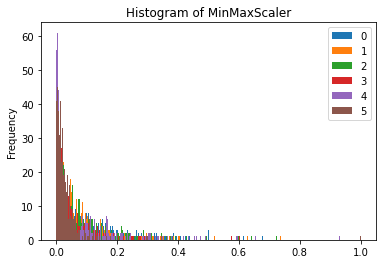

In [224]:
scaled_minmax = MinMaxScaler().fit_transform(continuous_df)
print(pd.DataFrame(scaled_minmax).describe())
pd.DataFrame(scaled_minmax).plot(kind='kde', title= 'KDE of MinMaxScaler')
pd.DataFrame(scaled_minmax).plot(kind='hist', bins= 300, title= 'Histogram of MinMaxScaler')

The MinMaxScaler does a better job in holding the actual shape of the original dataset. Also, MinMaxScaler doesn't reduce/ignore the importance of outliers. MinMaxScaler scales all the data features within the given range however StandardScaler doesn't guarantee balanced feature scales thus leading to the shrinkage in the range of the feature values. Therefore, I choose MinMaxScaler. 

**Optimal number of features using RFECV & Number of Features vs. Cross Validation Score**

In [247]:
x

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,3,12669,9656,7561,214,2674,1338
1,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
3,3,13265,1196,4221,6404,507,1788
4,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...
435,3,29703,12051,16027,13135,182,2204
436,3,39228,1431,764,4510,93,2346
437,3,14531,15488,30243,437,14841,1867
438,3,10290,1981,2232,1038,168,2125


In [248]:
y

0      0
1      0
2      0
3      1
4      0
      ..
435    1
436    1
437    0
438    1
439    1
Name: Channel, Length: 440, dtype: int64

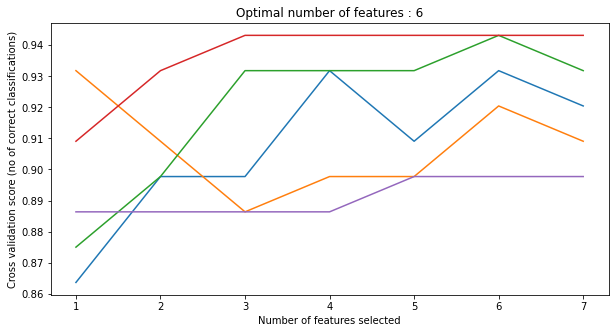

In [246]:
rf = RandomForestClassifier(max_depth = 7, random_state = 1)
rfecv = RFECV(estimator = rf)
rfecv.fit(x,y)

plt.figure(figsize = (10,5))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (no of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) +1), rfecv.grid_scores_)
plt.title("Optimal number of features : %d" % rfecv.n_features_)
plt.show()

warnings.filterwarnings('ignore')

**K-means Clustering using Elbow Method**

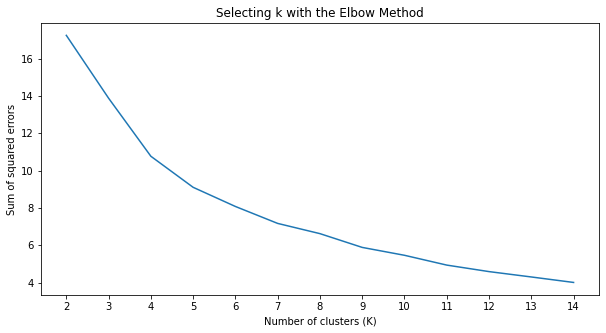

In [226]:
elbow_df = pd.DataFrame(columns = ['k', 'sse'])

for k in range(2,15):
    clustering = KMeans(n_clusters=k, random_state=5)
    clustering.fit(scaled_minmax)
    elbow_df.loc[elbow_df.shape[0]] = [k, clustering.inertia_]
    
    
plt.figure(figsize = (10, 5))
plt.xlabel("Number of clusters (K)")
plt.ylabel("Sum of squared errors")
plt.xticks(np.arange(min(elbow_df.k), max(elbow_df.k)+1, 1.0))
plt.plot(elbow_df.k, elbow_df.sse)
plt.title('Selecting k with the Elbow Method')
plt.show()

K = 14 is the optimum number of clusters

In [227]:
elbow_df

,k,sse
0,2.0,17.246033
1,3.0,13.878392
2,4.0,10.766660
3,5.0,9.102118
4,6.0,8.075228
5,7.0,7.167324
6,8.0,6.619243
7,9.0,5.881264
8,10.0,5.458951
9,11.0,4.933668


**Principal Component Analysis (PCA)**

In [228]:
pca = decomposition.PCA()
df_pca = pca.fit_transform(pd.DataFrame(scaled_minmax))
pca.explained_variance_ratio_[0:2] #Variance explained by 2 components

array([0.51948323, 0.26407007])

In [229]:
pca.explained_variance_ratio_[0:4] #Variance explained by 4 components

array([0.51948323, 0.26407007, 0.106061  , 0.06258016])

In [230]:
pca.explained_variance_ratio_.sum()

1.0

In [231]:
comp = pd.DataFrame(pca.components_, columns=['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'])
comp

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,-0.018545,0.490473,0.576447,-0.017416,0.647882,0.082140
1,0.863877,0.181824,-0.003639,0.396910,-0.126527,0.217017
2,-0.501784,0.333715,-0.086809,0.658337,-0.220706,0.383657
3,-0.024034,-0.627960,0.197409,0.605219,0.350505,-0.277443
4,-0.006627,-0.467946,0.208942,-0.205803,0.057185,0.831686
5,-0.031049,-0.041268,0.759956,-0.010319,-0.624023,-0.174035


<AxesSubplot:>

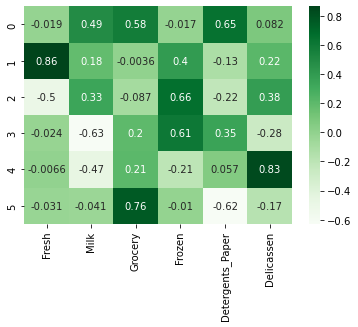

In [232]:
sns.heatmap(comp, cmap = 'Greens', annot=True)

The heatmap represents the volume of all the components after PCA. 

**XGBoost Classifier with 5 fold CV & Performance Metrics**

In [233]:
#Define the data matrix
df_dmatrix = xgb.DMatrix(data=x, label=y)

In [234]:
#Split x and y into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)

In [235]:
#Train the XGBoost Classifier
xgb_clf = XGBClassifier()
xgb_clf.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [236]:
start = time()
y_pred = xgb_clf.predict(x_test)
end = time()

#Accuracy, Precision & Recall
accuracy = round(accuracy_score(y_test, y_pred), 3)
precision = round(precision_score(y_test, y_pred, average='micro'), 3)
recall = round(recall_score(y_test, y_pred, average= 'micro'), 3)
print ('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {} ms'.format('XGBoost', accuracy, precision, recall, round((end - start)*1000,1)))

XGBoost -- Accuracy: 0.894 / Precision: 0.894 / Recall: 0.894 / Latency: 7.0 ms


In [ ]:
#5 fold CV & Performance Metrics
params = {'objective': 'binary:logistic', 'colsample_bytree':0.3, 'learning_rate':0.1, 'max_depth':5, 'apha': 10}
xgb_cv = cv(dtrain = df_dmatrix, params=params, nfold=5, metrics="auc", as_pandas=True)

In [241]:
xgb_cv.head()

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.961364,0.002707,0.918106,0.030585
1,0.972315,0.009761,0.938235,0.022001
2,0.976540,0.009769,0.941187,0.020438
3,0.981673,0.007346,0.940296,0.021761
4,0.985373,0.005356,0.947517,0.019785


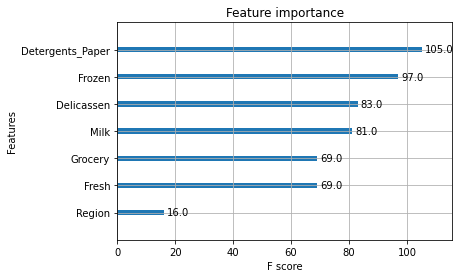

<Figure size 1152x864 with 0 Axes>

In [242]:
xgb.plot_importance(xgb_clf)
plt.figure(figsize = (16, 12))
plt.show()

#Detergents_Paper has the highest score amongst all the other features. 

**References**

* https://towardsdatascience.com/mastering-catplot-in-seaborn-categorical-data-visualization-guide-abab7b2067af
* https://www.w3resource.com/graphics/matplotlib/piechart/matplotlib-piechart-exercise-2.php
* https://datacarpentry.org/image-processing/05-creating-histograms/
* https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
* https://www.tutorialspoint.com/python_data_science/python_heat_maps.htm
* https://www.geeksforgeeks.org/standardscaler-minmaxscaler-and-robustscaler-techniques-ml/#:~:text=StandardScaler%20follows%20Standard%20Normal%20Distribution,negative%20values%20in%20the%20dataset.
* https://cmdlinetips.com/2019/03/catplot-in-seaborn-python/
* https://www.kaggle.com/code/prashant111/xgboost-k-fold-cv-feature-importance/notebook
* https://www.geeksforgeeks.org/python-seaborn-pointplot-method/
* https://prvnk10.medium.com/uses-of-histograms-in-machine-learning-e209bad36cd2